In [1]:
import numpy as np
import pandas as pd
import plotnine as pn
from rdot import ba_ibmse
from rdot import distortions

/Users/nathanielimel/uci/projects/rdot/src/rdot/ba_ibmse.py:68: SyntaxWarning: invalid escape sequence '\m'


In [2]:
# Medin and Schaffer deterministic category labels
py_x = np.array(
    [
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
    ]
)
py_x /= py_x.sum(axis=1)[:, None]
# get joint by multiplying by p(x)
px = np.full(py_x.shape[0], 1/py_x.shape[0])
pxy = py_x * px[:, None]

fx = np.array(
    [
        # A
        [0.,0.,0.,1.],
        [0.,1.,0.,1.],
        [0.,1.,0.,0.],
        [0.,0.,1.,0.],
        [1.,0.,0.,0.],
        # B
        [0.,0.,1.,1.],
        [1.,0.,0.,1.],
        [1.,1.,1.,0.],
        [1.,1.,1.,1.],
    ]
)

betas = np.logspace(-2, 5, num=300)
alphas = np.array([1.]) # 0 <= alpha <= 1. When alpha=1, we have vanilla IB

weights = np.ones(fx.shape[1])

In [3]:
results = ba_ibmse.ba_iterate_ib_mse_rda(
        pxy, 
        fx,
        betas,
        alphas,
        num_restarts=1,
        weights=weights,
)

  0%|          | 0/300 [00:00<?, ?it/s]

/Users/nathanielimel/uci/projects/rdot/src/rdot/ba_ibmse.py:120: RuntimeWarning: divide by zero encountered in log
100%|██████████| 300/300 [00:00<00:00, 3062.01it/s]


In [4]:
rd_values = [result[2:] for result in results]
data_alpha1 = pd.DataFrame(
    rd_values, 
    columns=[
        "rate", 
        "distortion",
        "accuracy",
        "beta",
        "alpha",
    ]
)
data_alpha1["alpha"] = 1.

In [5]:
# compare against alpha=0, when only clustering points
alphas = np.array([0.])
results = ba_ibmse.ba_iterate_ib_mse_rda(
        pxy, 
        fx,
        betas,
        alphas,
        num_restarts=1,
        weights=weights,
)
rd_values = [result[2:] for result in results]
data_alpha0 = pd.DataFrame(
    rd_values, 
    columns=[
        "rate", 
        "distortion",
        "accuracy",
        "beta",
        "alpha",
    ]
)
data_alpha0["alpha"] = 0.

100%|██████████| 300/300 [00:00<00:00, 2213.06it/s]


In [6]:
data = pd.concat([data_alpha1, data_alpha0])

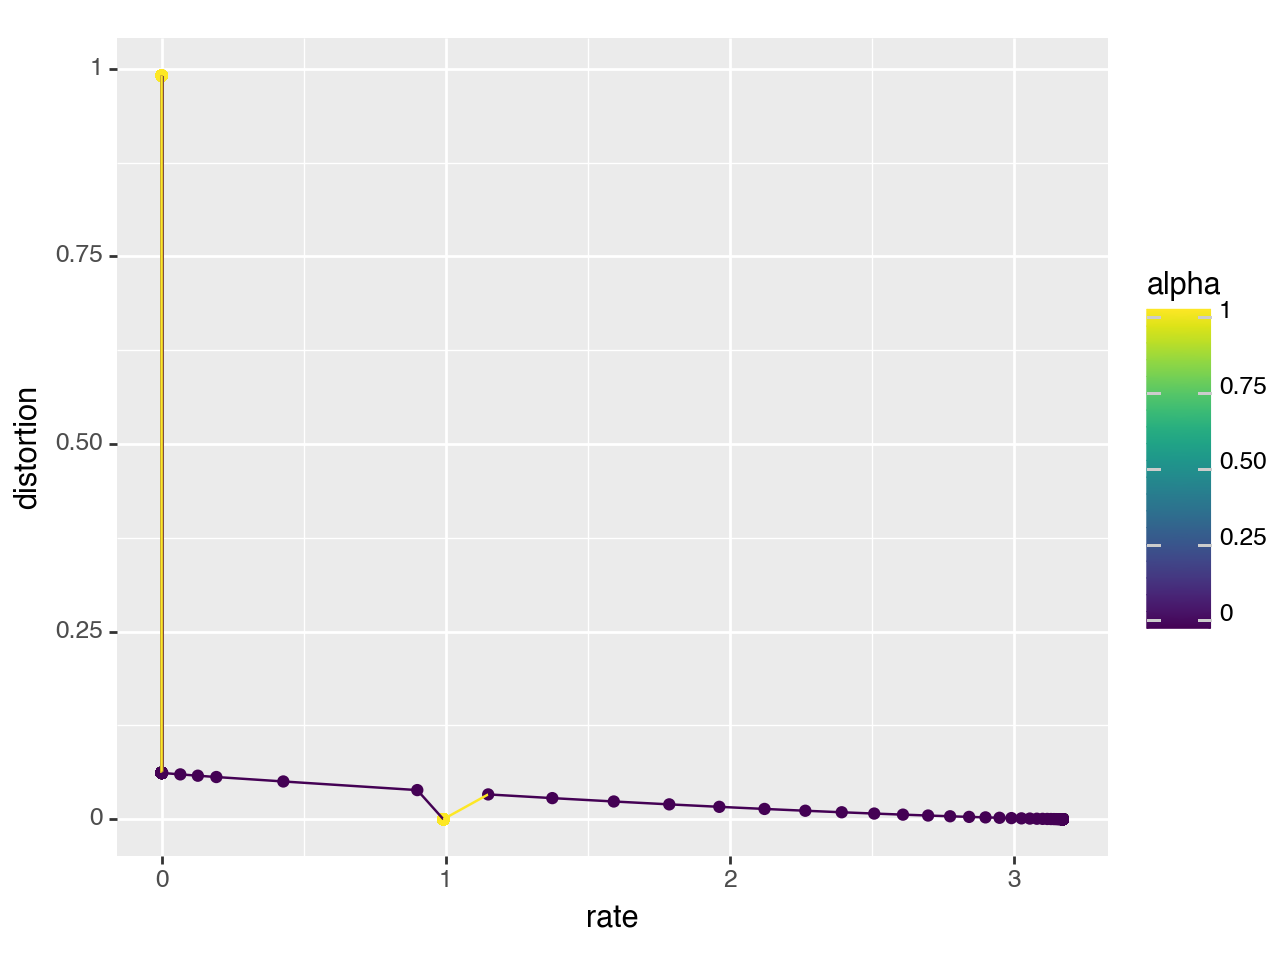

<Figure Size: (640 x 480)>

In [7]:
(
    pn.ggplot(
        data, 
        pn.aes(
            x="rate", 
            y="distortion", 
            color="alpha"
        )
    )
    + pn.geom_point()
    + pn.geom_line()
)

In [8]:
# f(xhat)
np.set_printoptions(suppress=True)
results[150][1]

array([[0.24446959, 0.24446959, 0.24446959, 0.83495273],
       [0.08578671, 0.78197213, 0.08578671, 0.62355397],
       [0.07167377, 0.86734459, 0.07167377, 0.37773512],
       [0.07167377, 0.07167377, 0.86734459, 0.37773512],
       [0.86734459, 0.07167377, 0.07167377, 0.37773512],
       [0.08578671, 0.08578671, 0.78197213, 0.62355397],
       [0.78197213, 0.08578671, 0.08578671, 0.62355397],
       [0.94101257, 0.94101257, 0.94101257, 0.44631915],
       [0.94203404, 0.94203404, 0.94203404, 0.53115661]])